In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

In [8]:
# Load pretrained ResNet
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Folder with X-ray images
folder_path = "/Users/dianaemal/breast_cancer_project/data/raw/"
benign = os.listdir(f"{folder_path}/benign")
malignant= os.listdir(f"{folder_path}/malignant")
all_images = benign + malignant

# Storage for features and filenames
feature_list = []
filenames = []

# Loop over each image in the folder
for file in all_images:
    if file.endswith('.jpg') or file.endswith('.png'):
        if file.startswith("benign"):
            img_path = os.path.join(f"{folder_path}/benign", file)
        elif file.startswith("malignant"):
            img_path = os.path.join(f"{folder_path}/malignant", file)
            
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        features = model.predict(x, verbose=0)
        feature_list.append(features.flatten())  # make it 1D
        filenames.append(file)


In [9]:
from sklearn.cluster import KMeans

# Convert list to array
X = np.array(feature_list)

# Apply KMeans
k = 2  # Try with 2 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_

# Print the results
for i in range(len(filenames)):
    print(f"{filenames[i]} --> Cluster {labels[i]}")



benign (328).png --> Cluster 0
benign (282).png --> Cluster 1
benign (144).png --> Cluster 0
benign (82).png --> Cluster 1
benign (390).png --> Cluster 0
benign (113).png --> Cluster 0
benign (406).png --> Cluster 1
benign (369).png --> Cluster 1
benign (386).png --> Cluster 0
benign (105).png --> Cluster 0
benign (410).png --> Cluster 1
benign (294).png --> Cluster 0
benign (152).png --> Cluster 1
benign (94).png --> Cluster 1
benign (200).png --> Cluster 0
benign (345).png --> Cluster 1
benign (129).png --> Cluster 0
benign (257).png --> Cluster 0
benign (312).png --> Cluster 1
benign (191).png --> Cluster 0
benign (57).png --> Cluster 0
benign (241).png --> Cluster 0
benign (304).png --> Cluster 0
benign (187).png --> Cluster 1
benign (41).png --> Cluster 1
benign (168).png --> Cluster 0
benign (216).png --> Cluster 0
benign (353).png --> Cluster 1
benign (16).png --> Cluster 0
benign (61).png --> Cluster 0
benign (148).png --> Cluster 0
benign (324).png --> Cluster 0
benign (261).p

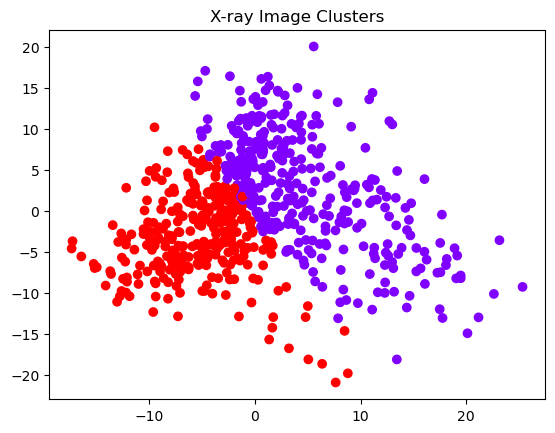

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='rainbow')
plt.title('X-ray Image Clusters')
plt.show()

In [11]:
# Apply KMeans
k = 3  # Try with 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_

# Print the results
for i in range(len(filenames)):
    print(f"{filenames[i]} --> Cluster {labels[i]}")




benign (328).png --> Cluster 2
benign (282).png --> Cluster 0
benign (144).png --> Cluster 2
benign (82).png --> Cluster 1
benign (390).png --> Cluster 2
benign (113).png --> Cluster 2
benign (406).png --> Cluster 1
benign (369).png --> Cluster 2
benign (386).png --> Cluster 2
benign (105).png --> Cluster 2
benign (410).png --> Cluster 1
benign (294).png --> Cluster 0
benign (152).png --> Cluster 2
benign (94).png --> Cluster 1
benign (200).png --> Cluster 0
benign (345).png --> Cluster 1
benign (129).png --> Cluster 2
benign (257).png --> Cluster 2
benign (312).png --> Cluster 1
benign (191).png --> Cluster 2
benign (57).png --> Cluster 2
benign (241).png --> Cluster 0
benign (304).png --> Cluster 0
benign (187).png --> Cluster 1
benign (41).png --> Cluster 2
benign (168).png --> Cluster 2
benign (216).png --> Cluster 0
benign (353).png --> Cluster 1
benign (16).png --> Cluster 2
benign (61).png --> Cluster 1
benign (148).png --> Cluster 2
benign (324).png --> Cluster 2
benign (261).p

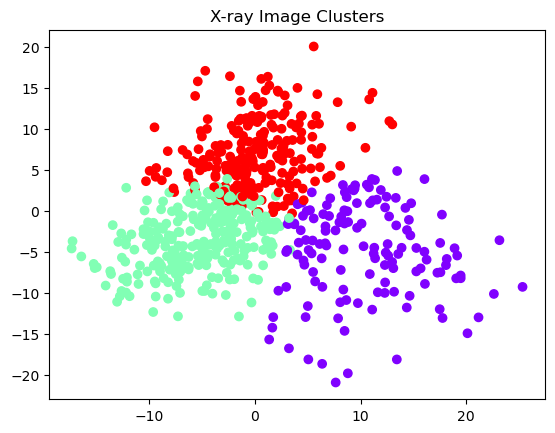

In [12]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='rainbow')
plt.title('X-ray Image Clusters')
plt.show()